<a href="https://colab.research.google.com/github/santos-luciano/GTDL/blob/main/An%C3%A1lise_do_tempo_de_recupera%C3%A7%C3%A3o_do_IBOVESPA_de_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance
!pip install lifelines

In [ ]:
import pandas as pd
import yfinance as yf
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick
from lifelines.plotting import plot_lifetimes

Em março de 2020, a B3 (bolsa de valores oficial do Brasil), acionou o seu mecanismo de defesa um total de 6 vezes, o *circuit breaker*. Essa ferramente é acionada em momentos de bastante variação do índice, comportamento comum em crises. A crise atrelada a este momento, se diz respeito ao aumento do número de casos de covid no mundo.

# Analisando o IBOVESPA no ano de 2020

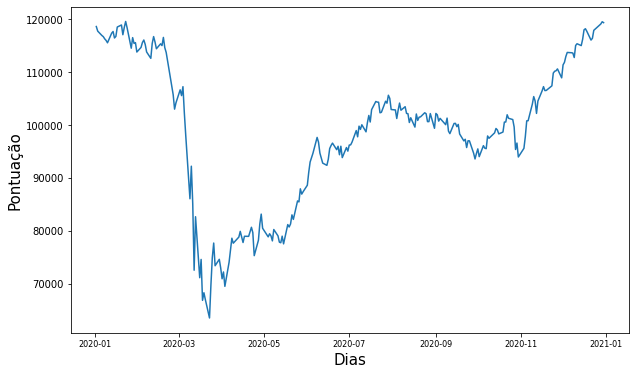

In [ ]:
plt.figure(figsize = (10,6))
plt.plot(ibovespa)
plt.xlabel('Dias',fontsize = 15)
plt.ylabel('Pontuação',fontsize = 15)
plt.xticks(fontsize = 8)
plt.show()

In [ ]:
ibovespa = yf.download('^BVSP',start = '2020-01-01',end = '2020-12-31')['Close']

[*********************100%***********************]  1 of 1 completed


Na figura acima, é possível observar a evolução do IBOVESPA ao longo de 2020. O índice tem uma queda acentuada no mês de março até chegar o sua pontuação mínima no ano, para assim iniciar sua recuperação.

In [ ]:
variacao = [0]
for dia in range(1,len(ibovespa)):
  variacao.append(ibovespa[dia]/ibovespa[dia-1]-1)
ibovespa_variacao = pd.DataFrame(variacao,columns = ['var'])
ibovespa_variacao.index = ibovespa.index

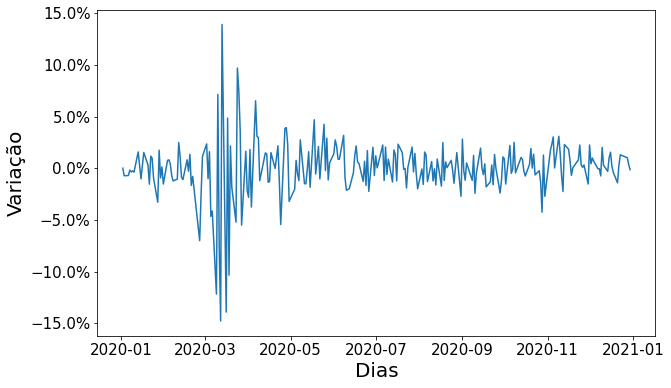

In [ ]:
plt.figure(figsize = (10,6))
plt.plot(ibovespa_variacao['var'])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.xlabel('Dias',fontsize = 20)
plt.ylabel('Variação',fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

Na Figura acima é mostrada a variação diária do IBOVESPA no ano de 2020, é possível observar que atingiu variações acima de 10%

Na seção abaixo, será explorado o comportamento das ações que integravam o índice no momento da crise

# Leitura do arquivo com as ações que integravam o IBOVESPA no 1º quadrimestre de 2020

O primeiro acionamento do *circuit breaker* aconteceu no dia 9 de março (segunda-feira), ou seja, foi observado uma variação de +10% na pontuação comporada com o último dia de negociação que foi 6 de março (sexta-feira).

Será analisada o tempo de recuperação das ações com o marco inicial o último dia antes do acionamento do mecanismo de defesa, o dia 06 de março de 2020.

In [ ]:
acoes_ibovespa = pd.read_excel('PRV_GMCT.XLSX',skiprows=1 ).iloc[:73]
cod_acoes = acoes_ibovespa['COD.'].values+'.SA'
cotacoes_acoes = yf.download(cod_acoes.tolist(),start = '2020-03-06',end = '2020-12-31')['Close']

[*********************100%***********************]  73 of 73 completed

11 Failed downloads:
- VIVT4.SA: No timezone found, symbol may be delisted
- BRDT3.SA: No timezone found, symbol may be delisted
- SMLS3.SA: No timezone found, symbol may be delisted
- IGTA3.SA: No timezone found, symbol may be delisted
- TIMP3.SA: No timezone found, symbol may be delisted
- GNDI3.SA: No timezone found, symbol may be delisted
- LAME4.SA: No timezone found, symbol may be delisted
- VVAR3.SA: No timezone found, symbol may be delisted
- BTOW3.SA: No timezone found, symbol may be delisted
- HGTX3.SA: No timezone found, symbol may be delisted
- PCAR4.SA: No timezone found, symbol may be delisted


In [ ]:
col_acao = cotacoes_acoes_ibo['VIVT4.SA']

In [ ]:
cotacoes_acoes_ibo = cotacoes_acoes.reset_index()
#cotacoes_acoes_ibo.reset_index(inplace = True)
primeira_recuperacao = []
falha = []
for cod in cod_acoes.tolist():
  col_acao = cotacoes_acoes_ibo[cod]
  if col_acao.isnull().sum()!=204:
    recuperacoes = col_acao[col_acao>=col_acao[0]]
    try:
      primeira_recuperacao.append(recuperacoes.index[1])
      falha.append(1)
    except:
      primeira_recuperacao.append(203)
      falha.append(0)
  else:
    primeira_recuperacao.append(None)
    falha.append(None)

In [ ]:
dados_sobrevivencia = pd.DataFrame([acoes_ibovespa['COD.'].values,primeira_recuperacao,falha],index = ['cod_acoes','dias','falha']).T
dados_sobrevivencia = dados_sobrevivencia.set_index('cod_acoes')
dados_sobrevivencia_completo = dados_sobrevivencia.dropna(subset = ['dias'])

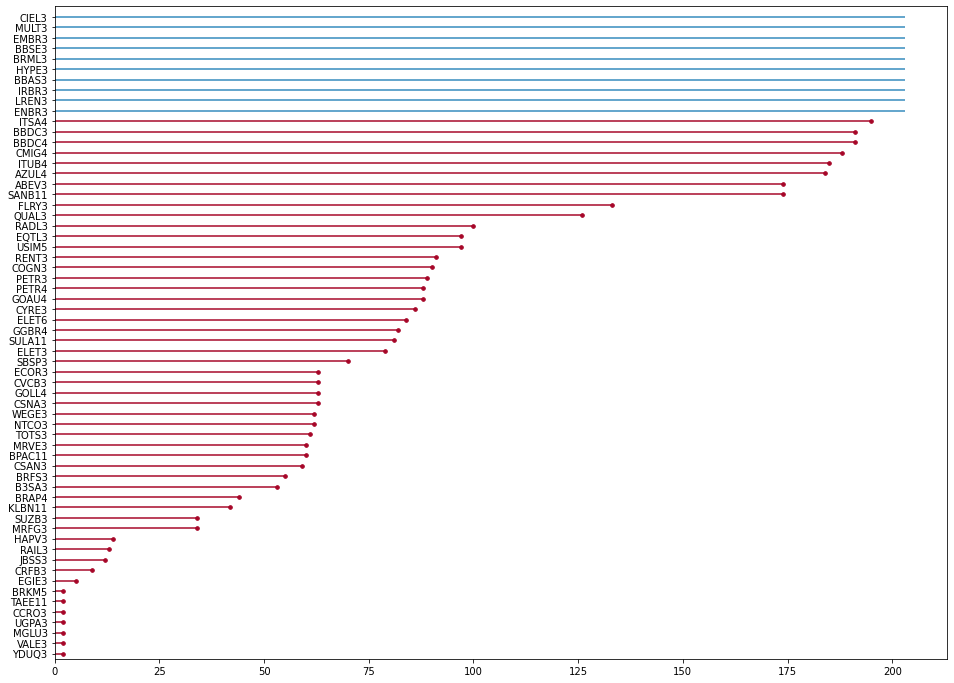

In [ ]:
plt.figure(figsize = (16,12))
ax = plot_lifetimes(dados_sobrevivencia_completo.dias,dados_sobrevivencia_completo.falha)

A figura acima mostra quantos dias de negociações na B3, foram necessários para a ação retomar a cotação do dia 06 de março de 2020. As ações com linha da cor azul, são ações que não conseguiram atingir a sua 1ª recuperação no ano de 2020.